YOLOv5  462c2dc Python-3.9.18 torch-1.12.1+cu116 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


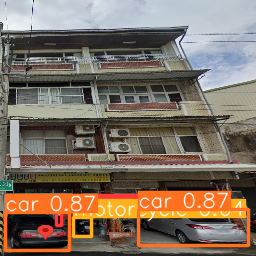

In [15]:
import torch

model = torch.hub.load("../","yolov5s",source = "local")

img = "../data/images/1.png"

results = model(img)

results.show()

In [7]:
import subprocess

# 要執行的命令及參數
command = ["python", "detect.py", "--save-txt"]

# 使用 subprocess 模組執行命令
process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

# 等待命令執行完成
stdout, stderr = process.communicate()

# 檢查執行結果
if process.returncode == 0:
    print("執行成功！")
    print("輸出：", stdout.decode())
else:
    print("執行失敗！")
    print("錯誤信息：", stderr.decode())



執行成功！
輸出： 
